# Machine Learning and Artificial Intelligence Research:  
### Time Series Forecasting using ARIMA

## Table of contents (click to skip to the section)
* [Introduction](#introduction_time)
  * [Background / Problem](#background_problem_time)
    * [Pros and Cons of ARIMA Models](#procon_time)
* [Data](#data_time)
  * [Import the Data](#pulldata_time)
  * [Exploration (Missing Values, Data Dispersion, Data Types)](#evaluate_time) 
    * [Plot Data](#plot_time)     
  * [Set Train / Test Splits](#train_test_time)
    * [Correlation Matrix](#corr_matrix_time) 
    * [Review Dataset Balance](#data_balance_time)     
  * [Data Processing and Preparation](#dataprep_time)
  * [Set Classification Target Values](#setclasstarget_time)
  * [Perform One Hot Encoding](#onehot_time)
  * [Scale / Normalize (for continuous features)](#normalize_time)
<!-- * [Recreate Dataframe Using Scaled Data](#normalizeddf_heart) -->  
* [Autoregressive Moving Average (ARMA)](#arma_time)
* [Autoregressive Integrated Moving Average (ARIMA)](#arima_time)
  * [ARIMA Scenario and Sensitivity Function](#arima_scenario_function)
  * [Get ARIMA Scenario Results](#arima_scenario_results)
  * [Identify ARIMA scenario with Min RMSE](#arima_min_rmse)
  * [Plot Min RMSE ARIMA Scenario](#arima_min_rmse_plot)
* [Seasonal ARIMA (SARIMA)](#sarima_time)
* [Conclusion](#conclusion_arima)

## Introduction <a name="introduction_time"></a>

### Background / Problem <a name="background_problem"></a>

Various industries rely on time series forecasting (finance, energy, retail, transportation, and the like). 
<br/>Such analyses help companies better manage and allocate their resources while striving to improve profitability and better anticipate future challenges. 
<br/><br/>Forecasting involves fitting models by using historical data in an attempt to predict future outcomes. 
<br/>While past performance doesn't guarantee future results, time series forecasting can be useful in planning for likely future scenarios. Below is a short list of business applications:
* Forecasting power demand to decide whether to build another power generation plant (planning)
* Forecasting call volumes to schedule staff (staffing)
* Forecasting inventory requirements to stock inventory (inventory management)
* Forecasting supply and demand to optimize fleet management(supply chain management)
* Predicting equipment failures and maintenance requirements to minimize downtime and uphold safety standards (plant management)
* Forecasting infection rates to optimize disease control and outbreak programs (health and epidemic forecasting)
* Predicting customer ratings through to forecasting product sales (customer satisfaction)

#### Pros and Cons of ARIMA Models <a name="procon_time"></a>
Pros of ARIMA models:
* Only requires the prior data of a time series to generalize the forecast.
* Performs well on short term forecasts.
* Models non-stationary time series.

Cons of ARIMA models:
* Difficult to predict turning points.
* There is quite a bit of subjectivity involved in determining (p,d,q) order of the model.
* Computationally expensive.
* Poorer performance for long term forecasts.
* Cannot be used for seasonal time series.

Inspiration comes from the following articles:
 * https://builtin.com/data-science/time-series-forecasting-python

 * https://www.capitalone.com/tech/machine-learning/understanding-arima-models/

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web 
import datetime

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data <a name="data_time"></a>

### Import the Data <a name="pulldata_time"></a>

In [28]:
# import bitcoin data using the btc ticker
btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))

In [29]:
print(btc.head())

Attributes     Adj Close         Close          High           Low  \
Symbols          BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2018-01-01  13657.200195  13657.200195  14112.200195  13154.700195   
2018-01-02  14982.099609  14982.099609  15444.599609  13163.599609   
2018-01-03  15201.000000  15201.000000  15572.799805  14844.500000   
2018-01-04  15599.200195  15599.200195  15739.700195  14522.200195   
2018-01-05  17429.500000  17429.500000  17705.199219  15202.799805   

Attributes          Open       Volume  
Symbols          BTC-USD      BTC-USD  
Date                                   
2018-01-01  14112.200195  10291200000  
2018-01-02  13625.000000  16846600192  
2018-01-03  14978.200195  16871900160  
2018-01-04  15270.700195  21783199744  
2018-01-05  15477.200195  23840899072  


Note: Adj Close is the closing price adjusted for dividends and stock splits

### Exploration (Missing Values, Data Dispersion, Data Types) <a name="evaluate"></a>

In [30]:
print(btc.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1068 entries, 2018-01-01 to 2020-12-03
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  1068 non-null   float64
 1   (Close, BTC-USD)      1068 non-null   float64
 2   (High, BTC-USD)       1068 non-null   float64
 3   (Low, BTC-USD)        1068 non-null   float64
 4   (Open, BTC-USD)       1068 non-null   float64
 5   (Volume, BTC-USD)     1068 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 58.4 KB
None


In [31]:
btc.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1.068000e+03
mean,8340.562386,8340.562386,8521.956158,8132.846514,8335.491895,1.808337e+10
std,2917.315633,2917.315633,2990.201006,2804.330783,2902.314357,1.341804e+10
min,3236.761719,3236.761719,3275.377930,3191.303467,3236.274658,2.923670e+09
25%,6501.759888,6501.759888,6599.932495,6410.339844,6499.859863,5.954865e+09
50%,8245.769043,8245.769043,8412.471191,8061.354980,8246.919922,1.575577e+10
75%,9938.704834,9938.704834,10188.992188,9700.504150,9936.261719,2.572260e+10
max,19625.835938,19625.835938,19845.974609,18925.785156,19633.769531,7.415677e+10


In [32]:
# Feature Selection

### Plot Data <a name="plot_time"></a>

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
btc.columns

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Attributes', 'Symbols'])

In [35]:
btc.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03'],
              dtype='datetime64[ns]', name='Date', length=1068, freq=None)

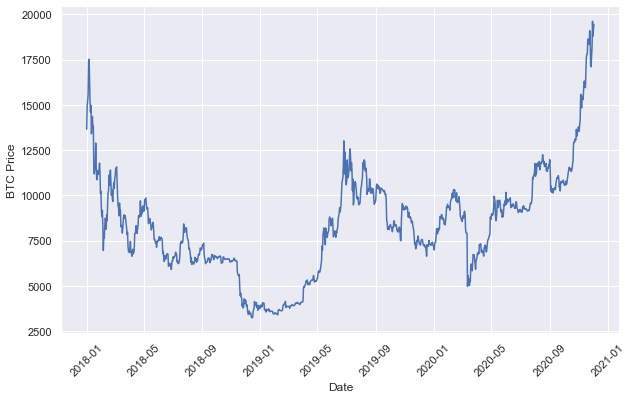

In [36]:
sns.set()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['Close', 'BTC-USD'])

##### Set Train / Test Splits <a name="train_test_time"></a>
Split data from November 2020; prior is training set, and post is testing data. 
<br />The plot below shows the training set in black with the test set in red.

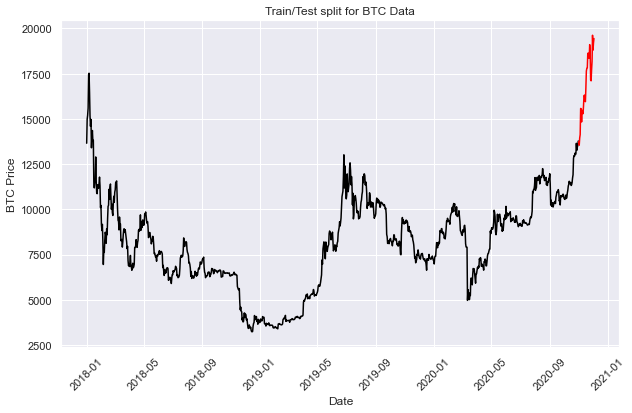

In [37]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index >= pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(train['Close', 'BTC-USD'], color = "black")
plt.plot(test['Close', 'BTC-USD'], color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

### Autoregressive Moving Average (ARMA)<a name="arma_time"></a>

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
y = train['Close', 'BTC-USD']

In [42]:
# define model
ARMA_sari = SARIMAX(y, order = (1, 0, 1))

In [43]:
# fit model
ARMAmodel = ARMA_sari.fit()

In [44]:
# create predictions
y_pred_arma = ARMAmodel.get_forecast(len(test.index))
y_pred_df_arma = y_pred_arma.conf_int(alpha = 0.05) 
y_pred_df_arma["Predictions"] = ARMAmodel.predict(start = y_pred_df_arma.index[0], end = y_pred_df_arma.index[-1])
y_pred_df_arma.index = test.index
y_pred_out_arma = y_pred_df_arma["Predictions"] 

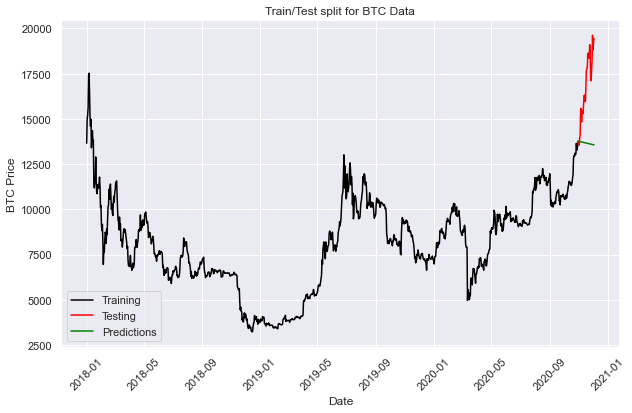

In [45]:
# plot results
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(train['Close', 'BTC-USD'], color = "black", label = 'Training')
plt.plot(test['Close', 'BTC-USD'], color = "red", label = 'Testing')
plt.plot(y_pred_out_arma, color='green', label = 'Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.legend()
plt.show()

In [74]:
print(ARMAmodel.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.001   1140.600      0.000       0.998       1.001
ma.L1         -0.0393      0.020     -1.953      0.051      -0.079       0.000
sigma2      1.183e+05   2136.402     55.385      0.000    1.14e+05    1.23e+05


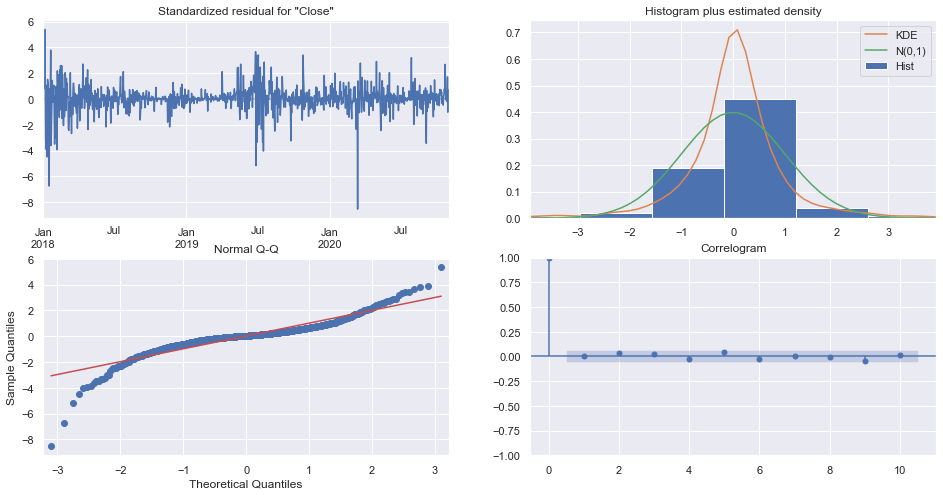

In [75]:
ARMAmodel.plot_diagnostics(figsize=(16,8))
plt.show()                           

In [46]:
# evaluate performance using root mean-squared error
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test['Close', 'BTC-USD'].values, y_pred_df_arma["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  3684.707093916663


RMSE is high. No surprises here since the predicted values decrease while the actual target values increase.
<br /> This is evidence as to why ARMA is limited in that it fails for non-stationary time series and does not capture seasonality.
<br /> Next up: ARIMA. Let's see if we can improve model performance.

### Autoregressive Integrated Moving Average (ARIMA)<a name="arima_time"></a>

An ARIMA task has three parameters ARIMA (p,d,q). 
1. p: Lagging (past values). p is the order of autoregressive model.
2. d: Differencing (this is what makes non-stationary data stationary). d is the degree of differencing
3. q: White noise (for modeling shock events). q is the order of the moving-average model.

In [47]:
from statsmodels.tsa.arima.model import ARIMA

In [48]:
ARIMA_func = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMA_func.fit()
y_pred_arima = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05) 
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
y_pred_out_arima = y_pred_df_arima["Predictions"] 

In [49]:
#y_pred_out_arima
#y

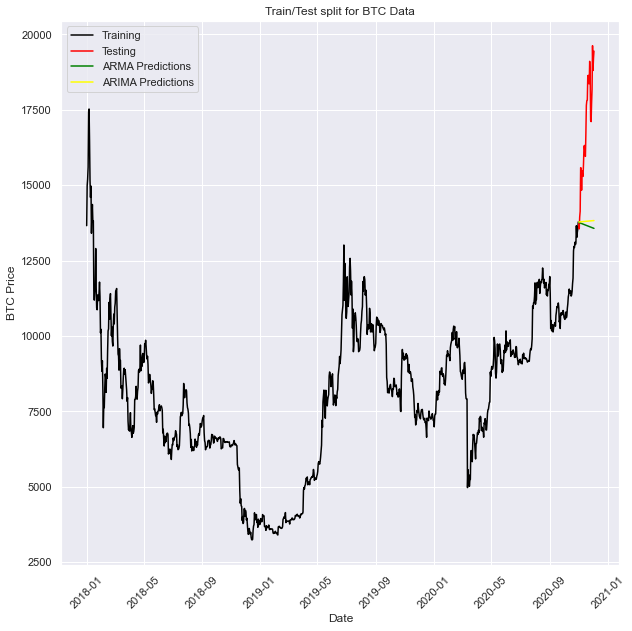

In [50]:
# plot results

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(train['Close', 'BTC-USD'], color = "black", label = 'Training')
plt.plot(test['Close', 'BTC-USD'], color = "red", label = 'Testing')
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.legend()
plt.show()

The plot shows that the ARIMA predictions in yellow are nearly on top of the ARMA predictions in green. 
<br/> Let's increase the differencing and other parameters and compare results.

In [52]:
# try creating function that cycles through parameter tuning and saves model results

### ARIMA Scenario and Sensitivity Function <a name="arima_scenario_function"></a>

In [53]:
def arima_scenarios(y, test_df, start_range=2, end_range=6):
    """
    This function iterates through ARIMA scenarios for p, d, q
    y: targets
    test_df: test dataframe that will use its index list
    start_range: beginning order for p, d, q (default is 2)
    end_range: end of range for order p, d, q (not including end_range)
    Final result will contain 1) a dataframe of RMSE results from pdq scenarios and 2) a list of predictions
    """
    import pandas as pd
    import numpy as np
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error
    
    rmse_list = []
    my_idx = []
    arima_list = [] # dictionary of dataframes
    scenario_index_list = []
    scenario_index = 0

    for p in range(start_range,end_range):
        arima_df = pd.DataFrame(columns=['RMSE'])
        for d in range(start_range,end_range):
            for q in range(start_range,end_range):
                # print(p,d,q)
                scenario = f'{p}{d}{q}'
                
                
                ARIMA_func = ARIMA(y, order = (p, d, q))
                ARIMAmodel = ARIMA_func.fit()
                y_pred_arima = ARIMAmodel.get_forecast(len(test_df.index))
                y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05) 
                y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
                y_pred_df_arima.index = test_df.index
                
                # simplify predictions to just index and prediction
                y_pred_out_arima = y_pred_df_arima["Predictions"] 
                arima_rmse = np.sqrt(mean_squared_error(test_df['Close', 'BTC-USD'].values, y_pred_df_arima["Predictions"]))
                
                my_idx.append(scenario)
                rmse_list.append(arima_rmse)
                arima_list.append(y_pred_out_arima)
                scenario_index_list.append(scenario_index)
                scenario_index += 1
                
                # arima_df.concat([arima_df])
                # CONSIDER ADDING LIST OF INDEXES
                
                
    # created dataframe of scenario and rmse result
    data = pd.DataFrame({'RMSE': rmse_list,
                        'scenario_index': my_idx},
                        index = scenario_index_list)
    
    #create dictionary of all dataframes
    # arima_list.insert(my_idx, arima_list)
    
    return data, arima_list

### Get ARIMA scenario results<a name="arima_scenario_results"></a>
Get the results of the ARIMA scenarios in a 1) dataframe and 2) list of predictions for each scenario

In [54]:
df, my_list = arima_scenarios(y, test)

In [55]:
df

,RMSE,scenario_index
0,3532.176070,222
1,3505.200646,223
2,3520.992003,224
3,3505.270469,225
4,3130.177439,232
5,2972.985590,233
6,2989.595773,234
7,2963.994059,235
8,1281.945464,242
9,1628.450580,243


In [56]:
df.shape

(64, 2)

### Identify ARIMA scenario with Min RMSE<a name="arima_min_rmse"></a>

In [57]:
df.loc[df.index == df.RMSE.idxmin()][['RMSE', 'scenario_index']]

,RMSE,scenario_index
26,671.897086,344


In [58]:
df.RMSE.idxmin()

26

In [59]:
arima_rmse_min_scenario = df.RMSE.idxmin()

In [60]:
arima_rmse_min_scenario

26

In [61]:
df.RMSE.min()

671.8970864806337

In [62]:
my_list[arima_rmse_min_scenario]

Date
2020-11-01    13990.501112
2020-11-02    14163.871372
2020-11-03    14384.060258
2020-11-04    14562.398281
2020-11-05    14751.435156
2020-11-06    14953.922263
2020-11-07    15112.401921
2020-11-08    15324.339176
2020-11-09    15474.960865
2020-11-10    15672.581851
2020-11-11    15835.086073
2020-11-12    16006.663653
2020-11-13    16183.792524
2020-11-14    16335.190571
2020-11-15    16515.245714
2020-11-16    16661.126970
2020-11-17    16830.200004
2020-11-18    16981.388351
2020-11-19    17133.774397
2020-11-20    17290.835873
2020-11-21    17430.769014
2020-11-22    17586.597137
2020-11-23    17722.523148
2020-11-24    17869.576370
2020-11-25    18007.091462
2020-11-26    18142.885230
2020-11-27    18281.677282
2020-11-28    18409.167264
2020-11-29    18544.975025
2020-11-30    18669.008779
2020-12-01    18797.801767
2020-12-02    18921.245144
2020-12-03    19042.058462
Name: Predictions, dtype: float64

In [63]:
my_list[arima_rmse_min_scenario].head()

Date
2020-11-01    13990.501112
2020-11-02    14163.871372
2020-11-03    14384.060258
2020-11-04    14562.398281
2020-11-05    14751.435156
Name: Predictions, dtype: float64

In [64]:
y_pred_out_arima = my_list[arima_rmse_min_scenario]

In [65]:
y_pred_out_arima.head()

Date
2020-11-01    13990.501112
2020-11-02    14163.871372
2020-11-03    14384.060258
2020-11-04    14562.398281
2020-11-05    14751.435156
Name: Predictions, dtype: float64

### Plot Min RMSE ARIMA scenario <a name="arima_min_rmse_plot"></a>

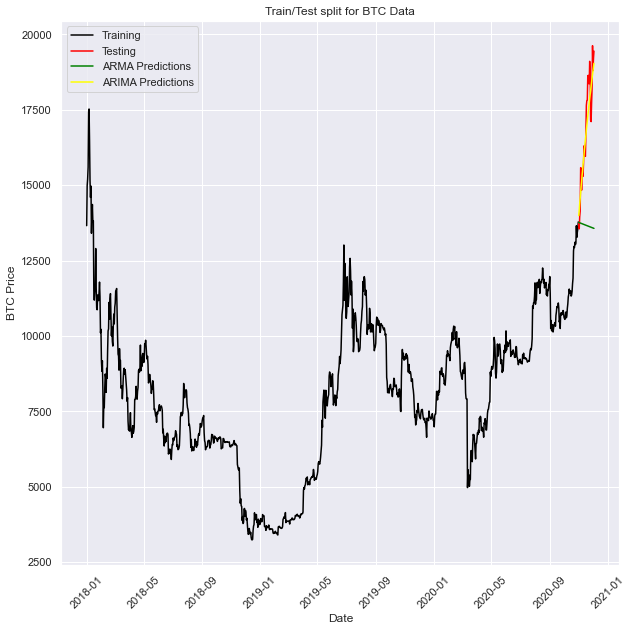

In [66]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(train['Close', 'BTC-USD'], color = "black", label = 'Training')
plt.plot(test['Close', 'BTC-USD'], color = "red", label = 'Testing')
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.legend()
plt.show()

### Seasonal ARIMA (SARIMA)<a name="sarima_time"></a>

Notes on the seasonal_order parameter of the SARIMA model:
* The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. 
* D must be an integer indicating the integration order of the process, while P and Q may either be an integers indicating the AR and MA orders 
* (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. 
* s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.

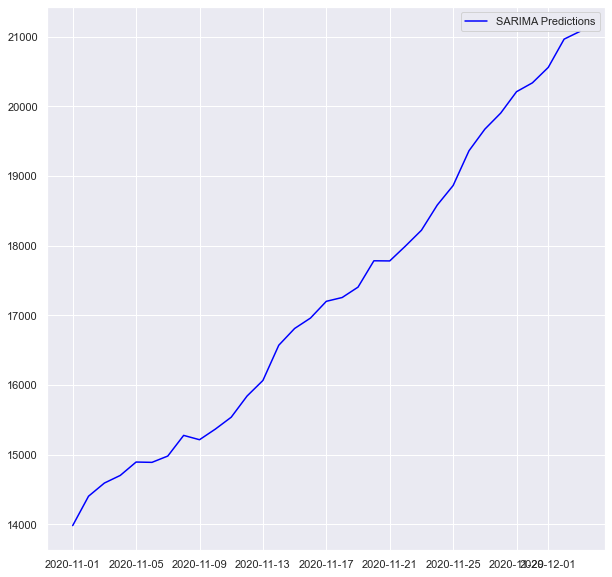

In [67]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred_sarimax = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_sarimax = y_pred_sarimax.conf_int(alpha = 0.05) 
y_pred_df_sarimax["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarimax.index[0], end = y_pred_df_sarimax.index[-1])
y_pred_df_sarimax.index = test.index
y_pred_out_sarimax = y_pred_df_sarimax["Predictions"] 
plt.plot(y_pred_out_sarimax, color='Blue', label = 'SARIMA Predictions')
plt.legend()

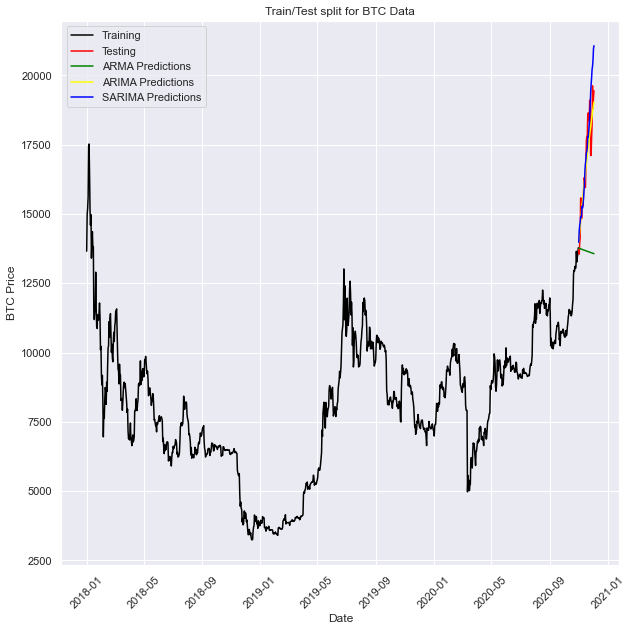

In [68]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(train['Close', 'BTC-USD'], color = "black", label = 'Training')
plt.plot(test['Close', 'BTC-USD'], color = "red", label = 'Testing')
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarimax, color='Blue', label = 'SARIMA Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.legend()
plt.show()

In [73]:
import numpy as np
from sklearn.metrics import mean_squared_error

sarima_rmse = np.sqrt(mean_squared_error(test['Close', 'BTC-USD'].values, y_pred_df_sarimax["Predictions"]))
print("RMSE: ",sarima_rmse)

RMSE:  1046.1301582283809


## Conclusion<a name="conclusion_arima"></a>

The ability to forecast future events accurately and reliably is a valuable skill with endless business applications.
<br/> Whether it's capital markets, transportation, hospitality, or various other sectors, data scientists can make a material impact to company profitability.
<br/> Python provides libraries that make it easy for data scientist neophites to gain proficiencies and quickly implement time series forecasting models.